
We're going to play with a special kind of pattern called a checkerboard. We'll make a grid with squares, and some squares will be black and others white, like a checkerboard.

Then, we're going to use a fancy tool called the SpectralBiclustering algorithm. This tool helps us organize the squares in a clever way. It doesn't just look at each row or column by itself; it looks at both rows and columns together. This way, it can find groups of squares that have similar patterns.

Imagine you're playing a matching game. You have cards with pictures on both sides, and you're trying to find pairs. But instead of just matching cards randomly, you try to find patterns in how the pictures are arranged on the cards.

After we run the algorithm, it will organize the squares into groups that have similar patterns. This is helpful for data where things need to be in a certain order, like pictures, sequences of events, or genetic information.

Finally, we'll rearrange the squares based on the groups the algorithm found. It's like putting all the black squares together and all the white squares together, so we can see the patterns more clearly.

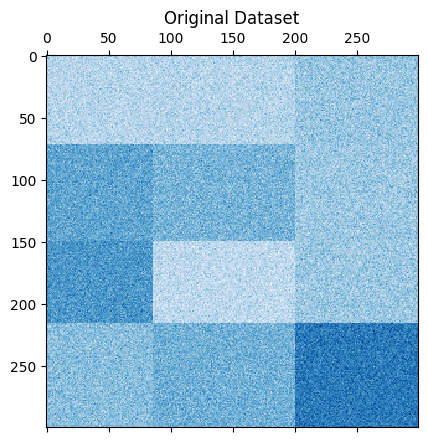

In [12]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_checkerboard

n_clusters = (4, 3)
data, rows, columns = make_checkerboard(shape = (300, 300), n_clusters = n_clusters, noise=10, shuffle=False, random_state=42)

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Original Dataset")
_ = plt.show()

We shuffle the data and the goal is to reconstruct it afterwards using SpectralBiclustering.

In [13]:
import numpy as np

rng = np.random.RandomState(0)

row_idx_shuffled = rng.permutation(data.shape[0])
col_idx_shuffled = rng.permutation(data.shape[1])

We redefine the shuffled data and plot it. We observe that we lost the structure of original data matrix.

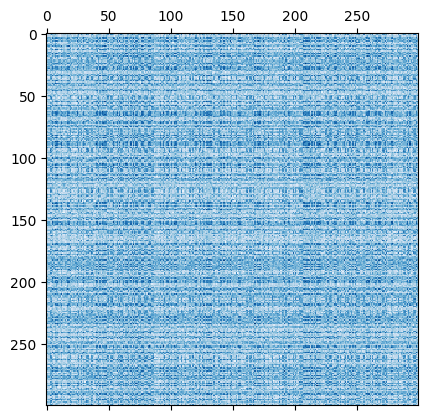

In [14]:
data = data[row_idx_shuffled][:, col_idx_shuffled]

plt.matshow(data, cmap=plt.cm.Blues)
_ = plt.show()

# **Fitting SpectralBiclustering**

We fit the model and compare the obtained clusters with the ground truth. Note that when creating the model we specify the same number of clusters that we used to create the dataset (n_clusters = (4, 3)), which will contribute to obtain a good result.

In [15]:
from sklearn.cluster import SpectralBiclustering
from sklearn.metrics import consensus_score


model = SpectralBiclustering(n_clusters = n_clusters, method = "log", random_state = 0)
model.fit(data)

# Compute the similarity of two sets of biclusters
score = consensus_score(model.biclusters_, (rows[:, row_idx_shuffled], columns[:, col_idx_shuffled]))

print(f"Consensus score: {score:.1f}")

Consensus score: 1.0


The score is between 0 and 1, where 1 corresponds to a perfect matching. It shows the quality of the biclustering.



# **Plotting results**

Now, we rearrange the data based on the row and column labels assigned by the SpectralBiclustering model in ascending order and plot again. The row_labels_ range from 0 to 3, while the column_labels_ range from 0 to 2, representing a total of 4 clusters per row and 3 clusters per column.

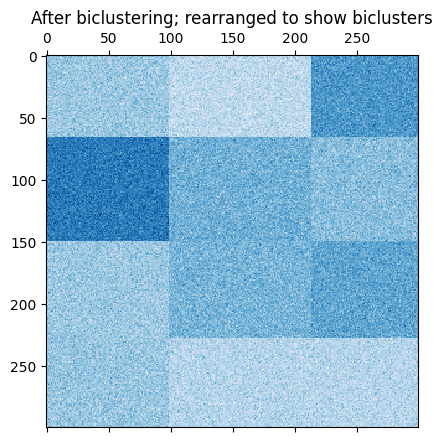

In [16]:
# Reordering first the rows and then the columns.

reordered_rows = data[np.argsort(model.row_labels_)]
reordered_data = reordered_rows[:, np.argsort(model.column_labels_)]

plt.matshow(reordered_data, cmap=plt.cm.Blues)
plt.title("After biclustering; rearranged to show biclusters")
_ = plt.show()

As a last step, we want to demonstrate the relationships between the row and column labels assigned by the model. Therefore, we create a grid with numpy.outer, which takes the sorted row_labels_ and column_labels_ and adds 1 to each to ensure that the labels start from 1 instead of 0 for better visualization.

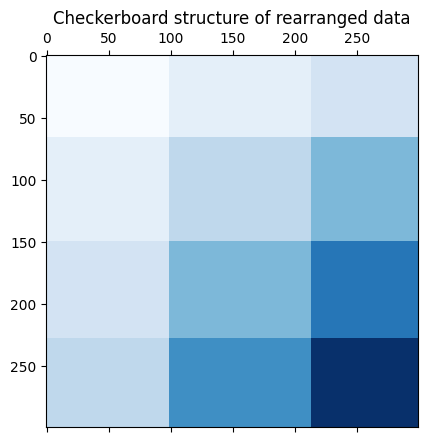

In [17]:
plt.matshow(np.outer(np.sort(model.row_labels_) + 1,
                     np.sort(model.column_labels_) + 1), cmap = plt.cm.Blues)
plt.title("Checkerboard structure of rearranged data")
plt.show()

The outer product of the row and column label vectors shows a representation of the checkerboard structure, where different combinations of row and column labels are represented by different shades of blue.